In [1]:
!pip install yfinance
!pip install forex_python

In [1]:
import pandas as pd
import yfinance as yf
from forex_python.converter import CurrencyRates

In [2]:
cr = CurrencyRates()

In [3]:
data_google = yf.Ticker("GOOG").history("5y")
data_google

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-08-21,45.500000,45.650002,45.169998,45.333000,18868000,0,0.0
2017-08-22,45.636002,46.292999,45.573750,46.234501,23334000,0,0.0
2017-08-23,46.096500,46.496498,45.967999,46.349998,21804000,0,0.0
2017-08-24,46.432999,46.542000,45.775002,46.063999,25406000,0,0.0
2017-08-25,46.174500,46.277748,45.775002,45.794498,21068000,0,0.0
...,...,...,...,...,...,...,...
2022-08-15,122.209999,123.260002,121.570000,122.879997,15525000,0,0.0
2022-08-16,122.320000,123.227997,121.535004,122.510002,15626200,0,0.0
2022-08-17,120.930000,122.150002,120.199997,120.320000,17589200,0,0.0


In [4]:
names=['GOOG','META','AAPL','AMZN','DELL','MSFT','TTM','AXP','ACN','TSLA']
firms={'GOOG':'Google','META':'Meta','AAPL':'Apple','DELL':'Dell', 'AMZN':'Amazon', 'MSFT':'Microsoft','TTM':'Tata','AXP':'Amex','ACN':'Accenture','TSLA': 'Tesla'}
df=pd.DataFrame(data_google.index)
for name in names:
    data = yf.Ticker(name).history("5y")
    data = cr.convert('USD', 'INR', data)
    sp = pd.DataFrame(data['High'])
    sp.rename(columns={'High':firms[name]},inplace=True)
    #df=pd.concat([df,sp])
    df=df.merge(sp,on='Date')
df
stock_price =df.set_index('Date')
stock_price.head()

,Google,Meta,Apple,Amazon,Dell,Microsoft,Tata,Amex,Accenture,Tesla
Date,,,,,,,,,,
2017-08-21,3634.866795,13376.946355,2982.899068,3826.762263,1479.745162,5422.902079,2340.169317,6350.243972,9455.871009,5507.161531
2017-08-22,3686.065285,13525.844119,3022.761060,3853.555830,1518.720512,5479.765778,2344.150642,6356.917806,9541.358409,5450.149988
2017-08-23,3702.268815,13485.235969,3031.640627,3829.947019,1524.445919,5473.033828,2395.110389,6340.605066,9517.038694,5629.305519
2017-08-24,3705.891874,13479.661658,3036.741315,3818.003500,1543.823335,5451.335974,2403.072887,6342.087776,9512.618129,5679.787781
2017-08-25,3684.850916,13407.204122,3033.340693,3812.509377,1598.653265,5487.996246,2403.072887,6373.971418,9564.203734,5664.340573


In [5]:
stock_price.shape

(1259, 10)

In [6]:
stock_price.describe()

,Google,Meta,Apple,Amazon,Dell,Microsoft,Tata,Amex,Accenture,Tesla
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,6625.037334,17844.345046,7170.075539,9335.219263,2687.049070,14334.677782,1521.066038,9671.850759,17402.119510,28678.327339
std,2601.763984,5083.597377,3761.363662,3176.747119,955.571577,6405.844698,710.806464,2516.519523,5803.902266,28701.386997
min,3634.866795,10330.506509,2804.356175,3776.718001,1199.009704,5422.902079,337.608628,5799.314547,9455.871009,2972.866961
25%,4520.332949,14104.715888,3667.182449,6923.067162,1953.725855,8313.301686,934.793733,7594.801768,12305.584950,5046.771509
50%,5410.138999,15717.115672,5664.463959,8010.242755,2253.263503,12887.953474,1513.665198,9015.287877,15323.106275,9185.662374
75%,9103.828259,21533.300326,10658.500279,12733.897720,3619.241684,20077.095036,2194.854366,11793.278872,22341.172429,55765.145603
max,12110.914418,30602.152458,14506.509669,15021.515064,4828.585988,27661.633005,2824.287521,15785.057005,32931.474096,99012.493406


In [20]:
changes = stock_price.pct_change()
changes

,Google,Meta,Apple,Amazon,Dell,Microsoft,Tata,Amex,Accenture,Tesla
Date,,,,,,,,,,
2017-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-22,0.014085,0.011131,0.013364,0.007002,0.026339,0.010486,0.001701,0.001051,0.009041,-0.010352
2017-08-23,0.004396,-0.003002,0.002938,-0.006127,0.003770,-0.001229,0.021739,-0.002566,-0.002549,0.032872
2017-08-24,0.000979,-0.000413,0.001682,-0.003118,0.012711,-0.003965,0.003324,0.000234,-0.000464,0.008968
2017-08-25,-0.005678,-0.005375,-0.001120,-0.001439,0.035516,0.006725,0.000000,0.005027,0.005423,-0.002720
...,...,...,...,...,...,...,...,...,...,...
2022-08-15,0.004974,-0.000110,0.007086,0.001323,0.008490,0.007776,0.001642,0.000361,0.000062,0.043221
2022-08-16,-0.000260,-0.002480,0.001846,0.019547,0.011088,-0.000476,0.024254,-0.000482,0.005982,0.004897
2022-08-17,-0.008748,-0.015747,0.014046,-0.021764,-0.019496,-0.000229,-0.020160,-0.009037,-0.007898,-0.015922


# Data Visualization

In [7]:
import matplotlib.pyplot as plt

In [8]:
cols = list(stock_price.columns)

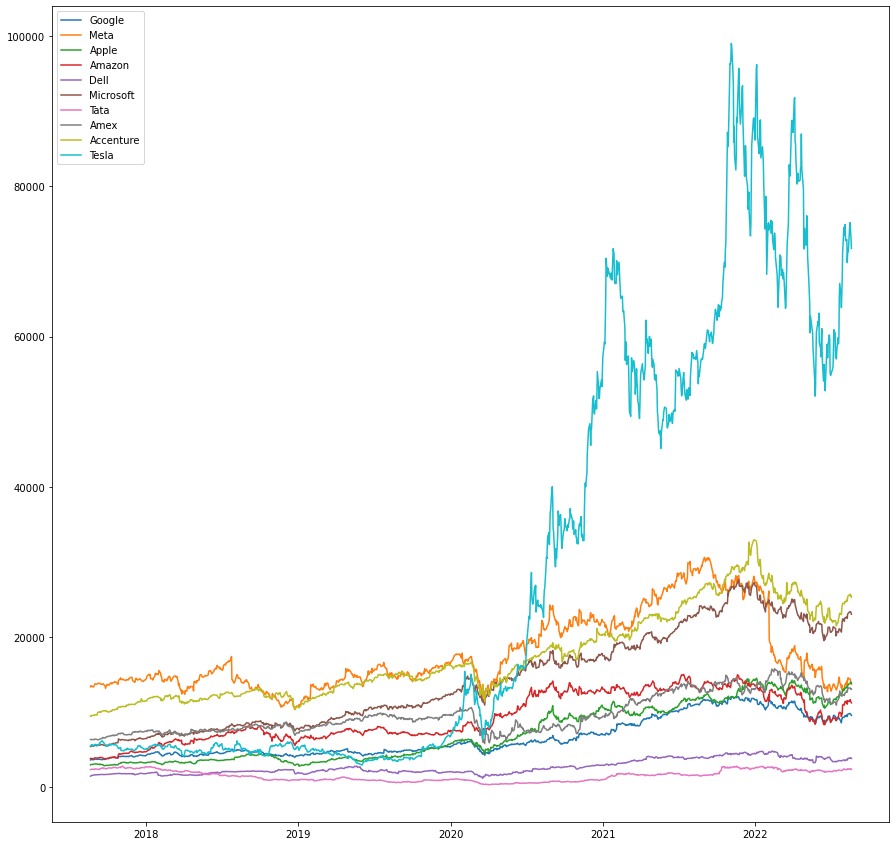

In [9]:
plt.figure(figsize=(15,15))
plt.plot(stock_price)
plt.legend(cols)
plt.show()

In [10]:
import seaborn as sns


In [13]:
!pip install PyPortfolioOpt

  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
torchvision 0.12.0+cu113 requires torch==1.11.0, but you have torch 1.7.1 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.
allennlp 1.5.0 requires transformers<4.3,>=4.1, but you have transformers 4.21.0 which is incompatible.


In [14]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(stock_price)
cov = CovarianceShrinkage(stock_price).ledoit_wolf()

In [15]:
cov

,Google,Meta,Apple,Amazon,Dell,Microsoft,Tata,Amex,Accenture,Tesla
Google,0.063057,0.047062,0.036334,0.042669,0.029611,0.036488,0.039855,0.032734,0.030639,0.051308
Meta,0.047062,0.117194,0.043149,0.051710,0.031559,0.037176,0.042962,0.030133,0.032855,0.054395
Apple,0.036334,0.043149,0.072056,0.042158,0.034165,0.037279,0.040172,0.032574,0.031188,0.064674
Amazon,0.042669,0.051710,0.042158,0.089694,0.027571,0.039132,0.031861,0.024241,0.029112,0.061110
Dell,0.029611,0.031559,0.034165,0.027571,0.126368,0.028815,0.051265,0.045467,0.031294,0.049773
Microsoft,0.036488,0.037176,0.037279,0.039132,0.028815,0.051404,0.031211,0.028096,0.029635,0.052101
Tata,0.039855,0.042962,0.040172,0.031861,0.051265,0.031211,0.245935,0.066363,0.037422,0.069910
Amex,0.032734,0.030133,0.032574,0.024241,0.045467,0.028096,0.066363,0.103690,0.036410,0.047417
Accenture,0.030639,0.032855,0.031188,0.029112,0.031294,0.029635,0.037422,0.036410,0.058265,0.044351
Tesla,0.051308,0.054395,0.064674,0.061110,0.049773,0.052101,0.069910,0.047417,0.044351,0.335085


In [16]:
mu

Google       0.213617
Meta         0.005099
Apple        0.359796
Amazon       0.240805
Dell         0.210758
Microsoft    0.336034
Tata         0.002307
Amex         0.155268
Accenture    0.217930
Tesla        0.672365
dtype: float64

In [17]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, cov)
weights = ef.max_sharpe()

In [18]:
weights

OrderedDict([('Google', 0.0),
             ('Meta', 0.0),
             ('Apple', 0.2798826017386007),
             ('Amazon', 0.0),
             ('Dell', 0.0),
             ('Microsoft', 0.5697730169215552),
             ('Tata', 0.0),
             ('Amex', 0.0),
             ('Accenture', 0.0),
             ('Tesla', 0.1503443813398441)])

In [19]:
ef.portfolio_performance(verbose=True)

Expected annual return: 39.3%
Annual volatility: 23.7%
Sharpe Ratio: 1.57


(0.393250108745671, 0.23699207692344795, 1.5749476252163335)

In [25]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(stock_price)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=200000)
allocated, left = da.lp_portfolio()
print(left)
print(allocated)

9461.321653826686
{'Apple': 5, 'Dell': 1, 'Microsoft': 5, 'Tata': 1}


In [24]:
latest_prices

Google        9554.961682
Meta         13720.925559
Apple        13833.992459
Amazon       11235.838740
Dell          3844.279486
Microsoft    23031.438888
Tata          2367.241720
Amex         13052.873321
Accenture    25300.742287
Tesla        71748.208631
Name: 2022-08-19 00:00:00, dtype: float64